In [1]:
from sympy import *
import networkx as nx
import matplotlib.pyplot as plt
from mpmath import cplot

In [138]:
# generate random graph (Erdos-Renyi graph)
G = nx.fast_gnp_random_graph(9,0.5)

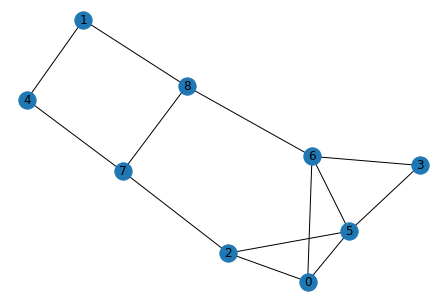

In [139]:
nx.draw(G, with_labels=True)

In [140]:
# initialise variables to solve for and gets edge pairs
var('x')
vertices = [Symbol('x' + str(i)) for i in list(G.nodes)]
edges = [(vertices[i], vertices[j]) for i, j in list(G.edges)]

In [141]:
# initialises generators of ideal for the given graph
ideal = []
for x in vertices:
    ideal.append( x**3 -1 )
for u,v in edges:
    ideal.append( u**2 + u*v + v**2)
g_basis = groebner(ideal)

In [142]:
# verify that g_basis is non-trivial
g_basis != [1]

True

In [143]:
list(g_basis)

[x0 + x5 - x7 - x8,
 x1**2 + x1*x8 + x8**2,
 x1*x4 - x1*x8 - x4*x7 + x7*x8,
 x2 + x7 + x8,
 x3 + x5 - x7 - x8,
 x4**2 + x4*x7 - x7*x8 - x8**2,
 x5**2 - x5*x7 - x5*x8 + x7*x8,
 x6 + x7 + x8,
 x7**2 + x7*x8 + x8**2,
 x8**3 - 1]

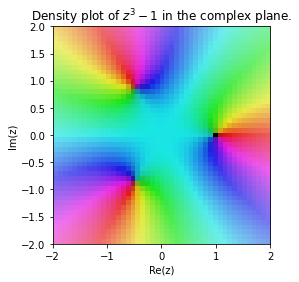

In [144]:
# visualise roots of x^3-1

fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_title(r"Density plot of $z^3 - 1$ in the complex plane.")

cplot(lambda z: z**3 - 1, re=[-2, 2], im=[-2, 2], axes=axes)

In [145]:
# initialise cube roots of unity
unityroots = roots(x**3 - 1, multiple=True)
unityroots

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [146]:
# initialise colour variables to make reading colouring solution easier
colour_variables = var('red,green,blue')

In [149]:
# solves for colourings
colourings = solve(g_basis, vertices)

In [148]:
# prints possible graph colourings
for colouring in colourings:
    colour_list = [colour.expand(complex=True).subs(zip(unityroots, colour_variables)) for colour in colouring]
    print(colour_list)

[red, red, green, red, green, -green - 1, green, red, -green - 1]
[red, red, green, red, -green - 1, -green - 1, green, red, -green - 1]
[red, red, -green - 1, red, green, green, -green - 1, red, green]
[red, red, -green - 1, red, -green - 1, green, -green - 1, red, green]
[red, -green - 1, green, red, green, -green - 1, green, -green - 1, red]
[red, green, -green - 1, red, -green - 1, green, -green - 1, green, red]
[red, green, green, red, red, -green - 1, green, -green - 1, red]
[red, green, green, red, -green - 1, -green - 1, green, red, -green - 1]
[red, green, -green - 1, red, red, green, -green - 1, green, red]
[red, -green - 1, green, red, red, -green - 1, green, -green - 1, red]
[red, -green - 1, -green - 1, red, red, green, -green - 1, green, red]
[red, -green - 1, -green - 1, red, green, green, -green - 1, red, green]
[green, red, red, green, green, -green - 1, red, -green - 1, green]
[green, red, red, green, -green - 1, -green - 1, red, green, -green - 1]
[green, red, -green